In [1]:
import numpy as np
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing, tree
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, roc_curve, auc, f1_score
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from collections import Counter
import requests

import keras
import tensorflow
from keras.datasets import mnist
from keras import backend as K
from keras.models import load_model
from tensorflow.keras import optimizers

from sklearn.model_selection import KFold, StratifiedKFold

from preprocessing import *
plt.rcParams["figure.dpi"] = 60

# Carga del dataset

In [2]:
from collections import Counter
import requests

with requests.get(
    "https://docs.google.com/spreadsheets/d/1wduqo5WyYmCpaGnE81sLNGU0VSodIekMfpmEwU0fGqs/export?format=csv") as r, open("features.csv", "wb") as f:
    for chunk in r.iter_content():
        f.write(chunk)

with requests.get(
    "https://docs.google.com/spreadsheets/d/1gvZ03uAL6THwd04Y98GtIj6SeAHiKyQY5UisuuyFSUs/export?format=csv") as r, open("target.csv", "wb") as f:
    for chunk in r.iter_content():
        f.write(chunk)

In [2]:
df_features = pd.read_csv("features.csv")
df_target = pd.read_csv("target.csv")
df = df_features.merge(df_target, left_on='id', right_on='id')

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Entrenamiento y seleccion de modelos

## Modelo 1

In [39]:
X_train, X_test, y_train, y_test = preprocessing_redes_2(df)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, random_state=117, test_size=0.3, stratify=y_train)

model1 = Sequential()
model1.add(Dense(13, input_dim=13, activation='tanh'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer=optimizers.SGD(learning_rate=0.0005), metrics=[tensorflow.keras.metrics.AUC()])

In [40]:
history1 = model1.fit(X_train.values, y_train, epochs=300, verbose=2, validation_data=(X_validation.values, y_validation))


Epoch 1/300
2189/2189 - 4s - loss: 0.5971 - auc_5: 0.7271 - val_loss: 0.5053 - val_auc_5: 0.7980 - 4s/epoch - 2ms/step
Epoch 2/300
2189/2189 - 4s - loss: 0.4668 - auc_5: 0.8163 - val_loss: 0.4361 - val_auc_5: 0.8355 - 4s/epoch - 2ms/step
Epoch 3/300
2189/2189 - 4s - loss: 0.4210 - auc_5: 0.8383 - val_loss: 0.4062 - val_auc_5: 0.8456 - 4s/epoch - 2ms/step
Epoch 4/300
2189/2189 - 4s - loss: 0.3996 - auc_5: 0.8455 - val_loss: 0.3908 - val_auc_5: 0.8498 - 4s/epoch - 2ms/step
Epoch 5/300
2189/2189 - 3s - loss: 0.3881 - auc_5: 0.8486 - val_loss: 0.3820 - val_auc_5: 0.8521 - 3s/epoch - 1ms/step
Epoch 6/300
2189/2189 - 3s - loss: 0.3813 - auc_5: 0.8506 - val_loss: 0.3765 - val_auc_5: 0.8537 - 3s/epoch - 1ms/step
Epoch 7/300
2189/2189 - 3s - loss: 0.3770 - auc_5: 0.8518 - val_loss: 0.3729 - val_auc_5: 0.8548 - 3s/epoch - 1ms/step
Epoch 8/300
2189/2189 - 3s - loss: 0.3741 - auc_5: 0.8529 - val_loss: 0.3704 - val_auc_5: 0.8558 - 3s/epoch - 1ms/step
Epoch 9/300
2189/2189 - 3s - loss: 0.3720 - auc_

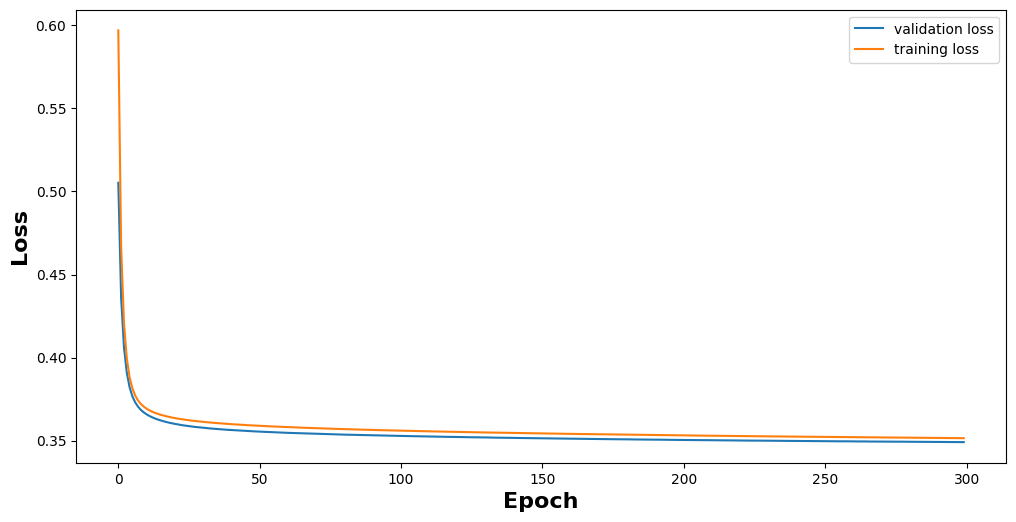

In [42]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(history1.history["val_loss"], label="validation loss")
plt.plot(history1.history["loss"], label="training loss")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("Loss", weight="bold", fontsize=16)
plt.legend()

## Modelo 2

In [7]:
X_train, X_test, y_train, y_test = preprocessing_redes_1(df)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, random_state=117, test_size=0.3, stratify=y_train)

model2 = Sequential()
model2.add(Dense(112, input_dim=112, activation='relu'))
model2.add(Dense(56, input_dim =112, activation='relu', kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0001), metrics=[tensorflow.keras.metrics.AUC()])

In [8]:
history2 = model2.fit(X_train.values, y_train, epochs=100, verbose=2, validation_data=(X_validation.values, y_validation))


Epoch 1/100
2189/2189 - 5s - loss: 0.7005 - auc: 0.8277 - val_loss: 0.4978 - val_auc: 0.8655 - 5s/epoch - 2ms/step
Epoch 2/100
2189/2189 - 4s - loss: 0.4598 - auc: 0.8677 - val_loss: 0.4306 - val_auc: 0.8719 - 4s/epoch - 2ms/step
Epoch 3/100
2189/2189 - 4s - loss: 0.4175 - auc: 0.8718 - val_loss: 0.4037 - val_auc: 0.8737 - 4s/epoch - 2ms/step
Epoch 4/100
2189/2189 - 4s - loss: 0.3966 - auc: 0.8740 - val_loss: 0.3902 - val_auc: 0.8760 - 4s/epoch - 2ms/step
Epoch 5/100
2189/2189 - 4s - loss: 0.3840 - auc: 0.8755 - val_loss: 0.3797 - val_auc: 0.8769 - 4s/epoch - 2ms/step
Epoch 6/100
2189/2189 - 4s - loss: 0.3754 - auc: 0.8767 - val_loss: 0.3704 - val_auc: 0.8780 - 4s/epoch - 2ms/step
Epoch 7/100
2189/2189 - 4s - loss: 0.3691 - auc: 0.8781 - val_loss: 0.3656 - val_auc: 0.8794 - 4s/epoch - 2ms/step
Epoch 8/100
2189/2189 - 4s - loss: 0.3645 - auc: 0.8792 - val_loss: 0.3617 - val_auc: 0.8802 - 4s/epoch - 2ms/step
Epoch 9/100
2189/2189 - 4s - loss: 0.3607 - auc: 0.8805 - val_loss: 0.3587 - val

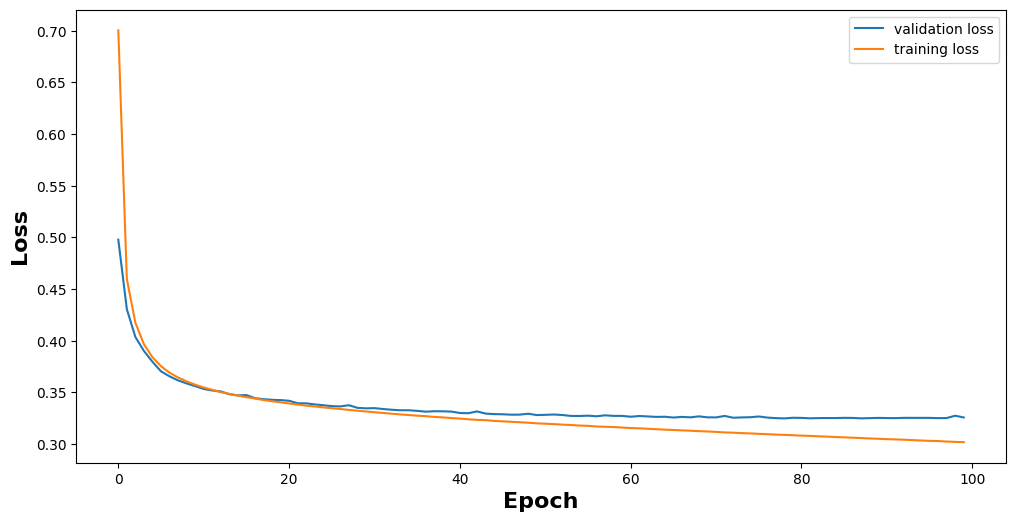

In [9]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(history2.history["val_loss"], label="validation loss")
plt.plot(history2.history["loss"], label="training loss")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("Loss", weight="bold", fontsize=16)
plt.legend()

## Modelo 3

In [34]:
X_train, X_test, y_train, y_test = preprocessing_redes_1(df)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, random_state=117, test_size=0.3, stratify=y_train)

model3 = Sequential()
model3.add(Dense(112, input_dim=112, activation='relu', kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model3.add(Dense(56, activation='relu', kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0001), metrics=[tensorflow.keras.metrics.AUC()])

In [35]:
history3 = model3.fit(X_train.values, y_train, epochs=100, verbose=2, validation_data=(X_validation.values, y_validation))


Epoch 1/100
2189/2189 - 5s - loss: 1.2088 - auc_4: 0.8423 - val_loss: 0.7299 - val_auc_4: 0.8694 - 5s/epoch - 2ms/step
Epoch 2/100
2189/2189 - 4s - loss: 0.6240 - auc_4: 0.8669 - val_loss: 0.5519 - val_auc_4: 0.8691 - 4s/epoch - 2ms/step
Epoch 3/100
2189/2189 - 4s - loss: 0.5191 - auc_4: 0.8672 - val_loss: 0.4877 - val_auc_4: 0.8697 - 4s/epoch - 2ms/step
Epoch 4/100
2189/2189 - 4s - loss: 0.4727 - auc_4: 0.8668 - val_loss: 0.4538 - val_auc_4: 0.8697 - 4s/epoch - 2ms/step
Epoch 5/100
2189/2189 - 4s - loss: 0.4460 - auc_4: 0.8663 - val_loss: 0.4352 - val_auc_4: 0.8693 - 4s/epoch - 2ms/step
Epoch 6/100
2189/2189 - 4s - loss: 0.4280 - auc_4: 0.8661 - val_loss: 0.4202 - val_auc_4: 0.8679 - 4s/epoch - 2ms/step
Epoch 7/100
2189/2189 - 4s - loss: 0.4159 - auc_4: 0.8661 - val_loss: 0.4073 - val_auc_4: 0.8688 - 4s/epoch - 2ms/step
Epoch 8/100
2189/2189 - 4s - loss: 0.4066 - auc_4: 0.8661 - val_loss: 0.3999 - val_auc_4: 0.8686 - 4s/epoch - 2ms/step
Epoch 9/100
2189/2189 - 4s - loss: 0.3999 - auc_

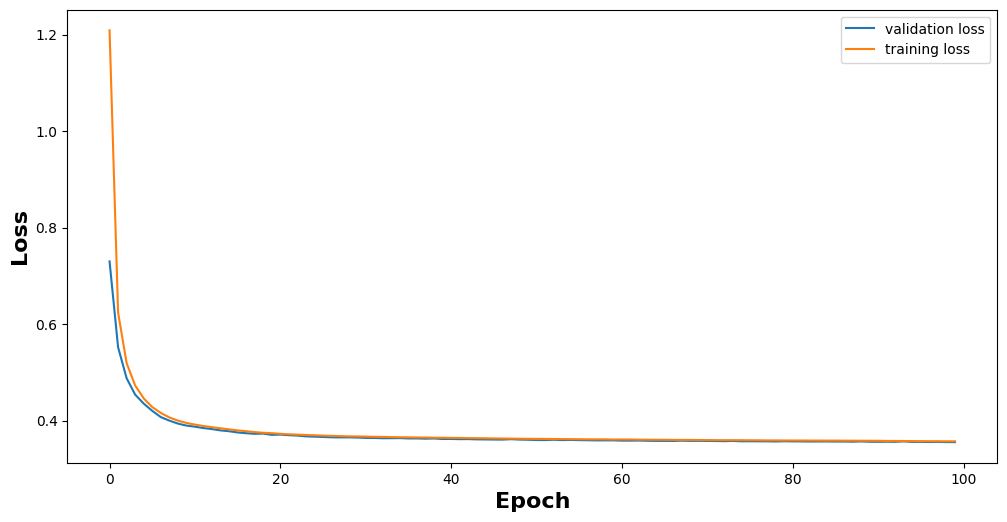

In [36]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(history3.history["val_loss"], label="validation loss")
plt.plot(history3.history["loss"], label="training loss")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("Loss", weight="bold", fontsize=16)
plt.legend()

# Evaluacion del modelo final

In [10]:
X_train, X_test, y_train, y_test = preprocessing_redes_1(df)

y_pred = model2.predict(X_test)

print(f"Auc Roc: {roc_auc_score(y_test, y_pred)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred.round())}")
print(f"Precision: {precision_score(y_test, y_pred.round())}")
print(f"Recall: {recall_score(y_test, y_pred.round())}")
print(f"F1 Score: {f1_score(y_test, y_pred.round())}")

Auc Roc: 0.8961706157703664
Accuracy: 0.8622953768663428
Precision: 0.737874097007224
Recall: 0.5829596412556054
F1 Score: 0.6513322705534047


# Predicciones finales

In [15]:
X_train, X_test, y_train, y_test = preprocessing_redes_1(df)

with requests.get(
    "https://docs.google.com/spreadsheets/d/1mR_JNN0-ceiB5qV42Ff9hznz0HtWaoPF3B9zNGoNPY8/export?format=csv") as r, open("pred.csv", "wb") as f:
    for chunk in r.iter_content():
        f.write(chunk)

df_pred = pd.read_csv("pred.csv")

In [36]:
df_pred_preprocess = preprocessing_redes_pred(df_pred)
y_pred_final = np.rint(model2.predict(df_pred_preprocess)).astype('int').flatten()
y_pred_final.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [32]:


df_pred_final = pd.DataFrame({'id': df_pred['id'], 'llovieron_hamburguesas_al_dia_siguiente': y_pred_final})
df_pred_final.loc[df_pred_final['llovieron_hamburguesas_al_dia_siguiente'] == 1, 'llovieron_hamburguesas_al_dia_siguiente'] = 'si'
df_pred_final.loc[df_pred_final['llovieron_hamburguesas_al_dia_siguiente'] == 0, 'llovieron_hamburguesas_al_dia_siguiente'] = 'no'

df_pred_final

ValueError: Data must be 1-dimensional

In [ ]:
df_pred_final.to_csv('predicciones/redes_neuronales.csv', index=False)

In [ ]:
df_pred_fins